### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import csv

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import xgboost
import pickle

In [127]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [27]:
df = pd.read_csv('REFINED_FLIGHT_DATA.csv') #import refined dataset file 

In [36]:
df = df[df.columns[1:]] #remove unwanted columns

In [37]:
df.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_GROUP,TAXI_OUT,AIR_TIME,FLIGHTS,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,ARR_DEL15
0,2021.0,4.0,10.0,16.0,6.0,0.0,13.000000,54.0,1.0,10.0,3130.0,98.0,43.0,203.0,17.0,0.0
1,2022.0,1.0,3.0,2.0,3.0,-1.0,26.000000,167.0,1.0,5.0,382.0,106.0,21.0,311.0,43.0,0.0
2,2021.0,4.0,10.0,24.0,7.0,-1.0,16.000000,119.0,1.0,17.0,1031.0,46.0,42.0,311.0,43.0,0.0
3,2021.0,4.0,12.0,27.0,1.0,-1.0,16.737944,91.0,1.0,7.0,95.0,118.0,36.0,198.0,4.0,0.0
4,2022.0,1.0,3.0,21.0,1.0,0.0,17.000000,127.0,1.0,5.0,1753.0,321.0,49.0,310.0,4.0,0.0
5,2021.0,4.0,10.0,19.0,2.0,-1.0,19.000000,62.0,1.0,13.0,452.0,257.0,12.0,278.0,37.0,0.0
6,2021.0,3.0,9.0,27.0,1.0,-1.0,7.000000,38.0,1.0,17.0,4682.0,91.0,43.0,162.0,43.0,0.0
7,2022.0,1.0,2.0,15.0,2.0,-1.0,14.000000,148.0,1.0,17.0,4024.0,231.0,8.0,162.0,43.0,0.0
8,2021.0,3.0,9.0,16.0,4.0,-1.0,16.000000,88.0,1.0,1.0,5227.0,231.0,8.0,23.0,9.0,0.0
9,2021.0,4.0,12.0,25.0,6.0,1.0,8.000000,45.0,1.0,17.0,4236.0,256.0,4.0,272.0,2.0,0.0


In [43]:
data = df[df.columns[:-1]] #get data df 

In [45]:
label = df[df.columns[-1]] #get label df 

In [48]:
X = np.array(data)

In [49]:
y = np.array(label)

### Perform stratified train test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1008, shuffle = True, stratify = y)

In [79]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1008)

In [99]:
adaboost = AdaBoostClassifier()

In [100]:
param_grid = { "n_estimators": [12, 24, 48, 76]}

### Perform Grid Search CV for AdaBoost Classifier

In [107]:
adb_cv = GridSearchCV(estimator = adaboost, param_grid=param_grid, cv = cv,verbose = 10,n_jobs = 1)

In [108]:
adb_cv.fit(X_train, y_train) #Do NOT retrain!

Fitting 30 folds for each of 4 candidates, totalling 120 fits
[CV 1/30; 1/4] START n_estimators=12............................................
[CV 1/30; 1/4] END .............n_estimators=12;, score=0.888 total time=  13.5s
[CV 2/30; 1/4] START n_estimators=12............................................
[CV 2/30; 1/4] END .............n_estimators=12;, score=0.888 total time=  13.4s
[CV 3/30; 1/4] START n_estimators=12............................................
[CV 3/30; 1/4] END .............n_estimators=12;, score=0.888 total time=  13.4s
[CV 4/30; 1/4] START n_estimators=12............................................
[CV 4/30; 1/4] END .............n_estimators=12;, score=0.888 total time=  13.3s
[CV 5/30; 1/4] START n_estimators=12............................................
[CV 5/30; 1/4] END .............n_estimators=12;, score=0.888 total time=  13.3s
[CV 6/30; 1/4] START n_estimators=12............................................
[CV 6/30; 1/4] END .............n_estimators=12

[CV 21/30; 2/4] END ............n_estimators=24;, score=0.892 total time=  26.6s
[CV 22/30; 2/4] START n_estimators=24...........................................
[CV 22/30; 2/4] END ............n_estimators=24;, score=0.893 total time=  26.7s
[CV 23/30; 2/4] START n_estimators=24...........................................
[CV 23/30; 2/4] END ............n_estimators=24;, score=0.893 total time=  26.8s
[CV 24/30; 2/4] START n_estimators=24...........................................
[CV 24/30; 2/4] END ............n_estimators=24;, score=0.892 total time=  27.6s
[CV 25/30; 2/4] START n_estimators=24...........................................
[CV 25/30; 2/4] END ............n_estimators=24;, score=0.894 total time=  26.8s
[CV 26/30; 2/4] START n_estimators=24...........................................
[CV 26/30; 2/4] END ............n_estimators=24;, score=0.893 total time=  26.6s
[CV 27/30; 2/4] START n_estimators=24...........................................
[CV 27/30; 2/4] END ........

[CV 12/30; 4/4] END ............n_estimators=76;, score=0.898 total time= 1.4min
[CV 13/30; 4/4] START n_estimators=76...........................................
[CV 13/30; 4/4] END ............n_estimators=76;, score=0.898 total time= 1.4min
[CV 14/30; 4/4] START n_estimators=76...........................................
[CV 14/30; 4/4] END ............n_estimators=76;, score=0.898 total time= 1.4min
[CV 15/30; 4/4] START n_estimators=76...........................................
[CV 15/30; 4/4] END ............n_estimators=76;, score=0.897 total time= 1.4min
[CV 16/30; 4/4] START n_estimators=76...........................................
[CV 16/30; 4/4] END ............n_estimators=76;, score=0.898 total time= 1.4min
[CV 17/30; 4/4] START n_estimators=76...........................................
[CV 17/30; 4/4] END ............n_estimators=76;, score=0.898 total time= 1.4min
[CV 18/30; 4/4] START n_estimators=76...........................................
[CV 18/30; 4/4] END ........

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1008),
             estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'n_estimators': [12, 24, 48, 76]}, verbose=10)

In [115]:
adaboost_best = adb_cv.best_estimator_
adb_cv.best_params_

{'n_estimators': 76}

In [170]:
adaboost_best = pickle.load(open('adaboost.sav','rb'))

In [ ]:
# Calculate Score 

In [145]:
adaboost_best.score(X_train,y_train)

0.8976882309356189

In [113]:
adaboost_best.score(X_test,y_test)

0.8978937523621618

In [120]:
y_pred_adb = adaboost_best.predict(X_test)

In [122]:
cm = confusion_matrix(y_test, y_pred_adb)

In [123]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90    312214
         1.0       0.91      0.88      0.90    312214

    accuracy                           0.90    624428
   macro avg       0.90      0.90      0.90    624428
weighted avg       0.90      0.90      0.90    624428



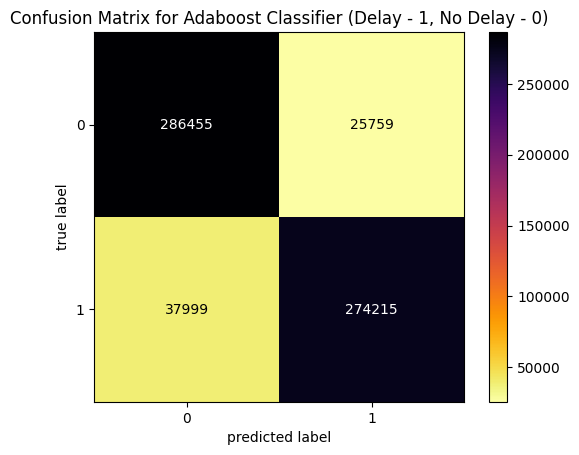

In [129]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for Adaboost Classifier (Delay - 1, No Delay - 0)')
plt.show()

AUC % = 0.9558372430287695


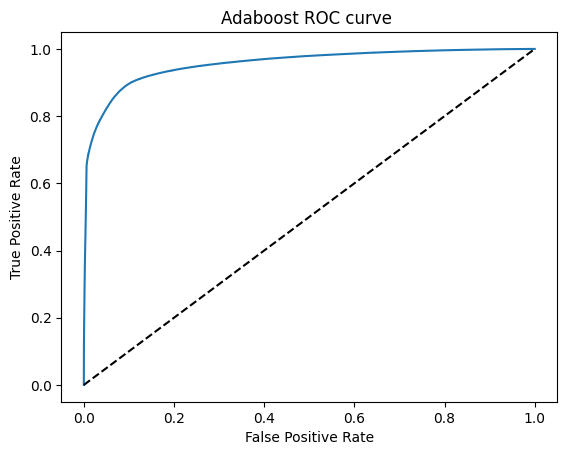

In [128]:
# ROC Curve plotting for Adaboost 
probs = adaboost_best.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC curve ')
# show the plot
plt.show()

In [130]:
cv = RepeatedStratifiedKFold(n_splits = 8, n_repeats=3, random_state=1008)

In [141]:
param_grid = { "learning_rate": [0.05], 
               "n_estimators": [64, 96, 128]}

In [142]:
xgb = xgboost.XGBClassifier()

In [143]:
xgb_cv = GridSearchCV(estimator = xgb, param_grid=param_grid, cv = cv,verbose = 10,n_jobs = 1)

In [144]:
xgb_cv.fit(X_train, y_train)#Do NOT retrain!

Fitting 24 folds for each of 3 candidates, totalling 72 fits
[CV 1/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 1/24; 1/3] END learning_rate=0.05, n_estimators=64;, score=0.899 total time=  28.3s
[CV 2/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 2/24; 1/3] END learning_rate=0.05, n_estimators=64;, score=0.899 total time=  29.0s
[CV 3/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 3/24; 1/3] END learning_rate=0.05, n_estimators=64;, score=0.899 total time=  29.9s
[CV 4/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 4/24; 1/3] END learning_rate=0.05, n_estimators=64;, score=0.898 total time=  30.7s
[CV 5/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 5/24; 1/3] END learning_rate=0.05, n_estimators=64;, score=0.898 total time=  31.2s
[CV 6/24; 1/3] START learning_rate=0.05, n_estimators=64........................
[CV 6/24; 1/3

[CV 1/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.901 total time= 1.1min
[CV 2/24; 3/3] START learning_rate=0.05, n_estimators=128.......................
[CV 2/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.900 total time= 1.1min
[CV 3/24; 3/3] START learning_rate=0.05, n_estimators=128.......................
[CV 3/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.900 total time= 1.1min
[CV 4/24; 3/3] START learning_rate=0.05, n_estimators=128.......................
[CV 4/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.900 total time= 1.1min
[CV 5/24; 3/3] START learning_rate=0.05, n_estimators=128.......................
[CV 5/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.899 total time= 1.1min
[CV 6/24; 3/3] START learning_rate=0.05, n_estimators=128.......................
[CV 6/24; 3/3] END learning_rate=0.05, n_estimators=128;, score=0.900 total time= 1.1min
[CV 7/24; 3/3] START learning_rate=0.05, n_estimators=128....

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=8, random_state=1008),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.05],
                         'n_estimators': [64, 96, 128]},
             verbose=10)

In [146]:
xgboost_best = xgb_cv.best_estimator_
xgb_cv.best_params_

{'learning_rate': 0.05, 'n_estimators': 128}

In [166]:
xgboost_best = pickle.load(open('xgboost.sav','rb'))

In [167]:
xgboost_best.score(X_train,y_train)

0.9002356289809768

In [168]:
xgboost_best.score(X_test,y_test)

0.9003455962897243

In [149]:
y_pred_xgb = xgboost_best.predict(X_test)

In [150]:
cm = confusion_matrix(y_test, y_pred_xgb)

In [152]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90    312214
         1.0       0.91      0.88      0.90    312214

    accuracy                           0.90    624428
   macro avg       0.90      0.90      0.90    624428
weighted avg       0.90      0.90      0.90    624428



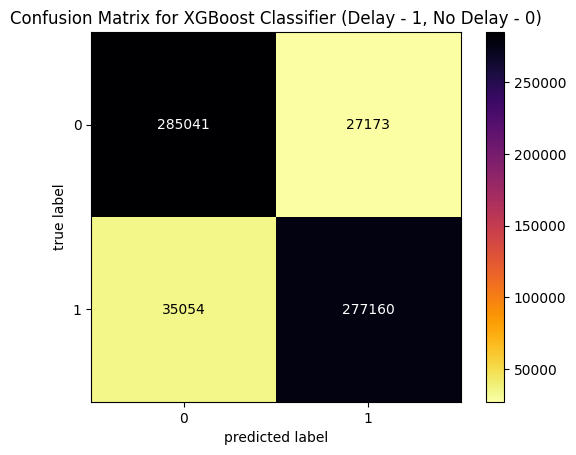

In [169]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for XGBoost Classifier (Delay - 1, No Delay - 0)')
plt.show()

AUC % = 0.9602378912608699


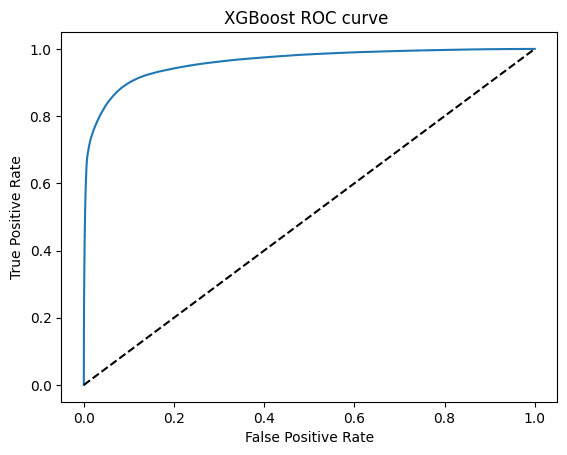

In [154]:
probs = xgboost_best.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
print('AUC % = {}'.format(auc(fper, tper)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve ')
# show the plot
plt.show()

In [164]:
pickle.dump(adaboost_best, open('adaboost.sav', 'wb'))

In [165]:
pickle.dump(xgboost_best, open('xgboost.sav', 'wb'))